In [1]:
# Apollonian_Gasket 

In [66]:
import numpy as np
import matplotlib.pyplot as plt

In [380]:
# Seed circles
c_0 = np.array([0,0])
R_0 = 1.0
theta_c_1 = np.random.rand(1)*2*np.pi
r_c_1 = R_0*(np.random.rand(1)*0.5+0.25)
c_1 = np.hstack(r_c_1*(np.cos(theta_c_1),np.sin(theta_c_1)))
R_1 = R_0 - np.sqrt(np.sum((c_1-c_0)**2))
c_2 = -c_1*(R_0-r_c_1)/r_c_1
R_2 = R_0 - R_1

c_seed = np.vstack((c_0,c_1,c_2))
R_seed = np.hstack((R_0,R_1,R_2))

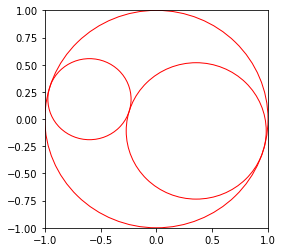

In [381]:
# Plot seed circles
fig = plt.figure(figsize=(4, 4))
ax = plt.subplot(1, 1, 1)
for i in range(len(R_seed)):
    circle = plt.Circle((c_seed[i,0], c_seed[i,1]), R_seed[i], color='r', fill=False)
    ax.add_patch(circle)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
plt.show()

In [382]:
# Generate new fitted circles 
k_seed = 1/R_seed
k_seed[0] = -k_seed[0]
n_iter = 4
circle_list_seed = [0,1,2]
circle_list = [circle_list_seed]
k = k_seed
c = c_seed
tol = 1e-6
for i in range(n_iter):
    circle_list_i = []
    if i==0:
        circle_list_i_next = circle_list
    for j, circle_list_j in enumerate(circle_list_i_next):
        # radius
        id_1 = len(k)
        id_2 = len(k)+1
        k_1 = k[circle_list_j[0]]
        k_2 = k[circle_list_j[1]]
        k_3 = k[circle_list_j[2]]
        if i==0:
            k_i = k_1 + k_2 + k_3
            k = np.hstack((k,k_i))
        else:
            k_i = k_1 + k_2 + k_3 + 2*np.sqrt(k_1*k_2 + k_2*k_3 + k_3*k_1)
        k = np.hstack((k,k_i))
        R = 1/k
        
        # center
        c_1 = c[circle_list_j[0],0] + c[circle_list_j[0],1]*1j
        c_2 = c[circle_list_j[1],0] + c[circle_list_j[1],1]*1j
        c_3 = c[circle_list_j[2],0] + c[circle_list_j[2],1]*1j
        c_i1 = (k_1*c_1 + k_2*c_2 + k_3*c_3 + 2*np.sqrt(k_1*k_2*c_1*c_2 + k_2*k_3*c_2*c_3 + k_3*k_1*c_3*c_1))/k_i
        c_i2 = (k_1*c_1 + k_2*c_2 + k_3*c_3 - 2*np.sqrt(k_1*k_2*c_1*c_2 + k_2*k_3*c_2*c_3 + k_3*k_1*c_3*c_1))/k_i

        if i == 0:
            c = np.vstack((c,np.array([np.real(c_i1),np.imag(c_i1)]),np.array([np.real(c_i2),np.imag(c_i2)])))
        else:
            cond_1 = abs((np.abs(c_i1-c_1)-np.abs(R[circle_list_j[0]]+1/k_i))+
                         (np.abs(c_i1-c_2)-np.abs(R[circle_list_j[1]]+1/k_i))+
                         (np.abs(c_i1-c_3)-np.abs(R[circle_list_j[2]]+1/k_i)))
            if cond_1<tol:
                c_i = c_i1
            else:
                c_i = c_i2
            c = np.vstack((c,np.array([np.real(c_i),np.imag(c_i)])))
        
        # append circle list
        for l in range(3):
            if i == 0:
                circle_list_i_l1 = circle_list_j.copy()
                circle_list_i_l2 = circle_list_j.copy()
                circle_list_i_l1[l] = id_1
                circle_list_i_l2[l] = id_2
                circle_list_i.append(circle_list_i_l1)
                circle_list_i.append(circle_list_i_l2)
            else:
                circle_list_i_l1 = circle_list_j.copy()
                circle_list_i_l1[l] = id_1
                circle_list_i.append(circle_list_i_l1)
    circle_list_i_prev = circle_list_i_next
    circle_list_i_next = circle_list_i

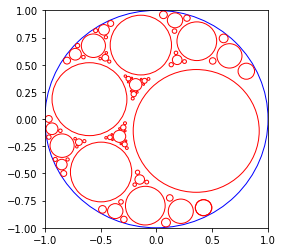

In [383]:
# Plot circles
fig = plt.figure(figsize=(4, 4))
ax = plt.subplot(1, 1, 1)
circle = plt.Circle((c[0,0], c[0,1]), R[0], color='b', fill=False)
ax.add_patch(circle)
for i in range(len(R)-1):
    circle = plt.Circle((c[i+1,0], c[i+1,1]), 0.9*R[i+1], color='r', fill=False)
    ax.add_patch(circle)
# ic = 7
# circle = plt.Circle((c[ic,0], c[ic,1]), R[ic], color='b')
ax.add_patch(circle)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
plt.show()

In [371]:
c

array([[ 0.        ,  0.        ],
       [-0.55508141, -0.17760226],
       [ 0.39735458,  0.12713644],
       [-0.01259967, -0.67862798],
       [-0.40419506,  0.54527153],
       [-0.08904411, -0.30029874],
       [-0.24682571,  0.19283479],
       [ 0.4972415 , -0.6392855 ],
       [ 0.03379046,  0.80919297],
       [-0.46843042, -0.72490186],
       [-0.8022252 ,  0.31834652],
       [-0.11133783, -0.21053974],
       [-0.003564  , -0.33128682],
       [-0.1535322 , -0.36249206],
       [-0.21287474,  0.10680561],
       [-0.19521015,  0.26768761],
       [-0.33543882,  0.20604229],
       [ 0.30770096, -0.49647266],
       [ 0.75050344, -0.47253301],
       [ 0.34312629, -0.85712707],
       [-0.03764528,  0.58287891],
       [ 0.33681158,  0.82042721],
       [-0.21815518,  0.89711247],
       [-0.35986093, -0.58832188],
       [-0.34013494, -0.8753999 ],
       [-0.66237624, -0.65282581],
       [-0.63453739,  0.27015703],
       [-0.78512055,  0.51536637],
       [-0.9183099 ,